In [9]:
### Import required libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

In [10]:
### Upload the image
# uploaded = files.upload()
# image_path = list(uploaded.keys())[0]

image_path = '/content/sample_image.jpg'  # Change this to your image's file name

### Read the image
img = cv2.imread(image_path)

Original Image:


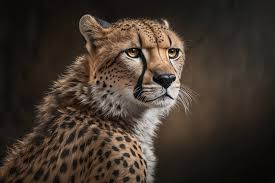

Grayscale Image:


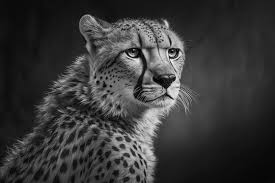

In [11]:
### Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Display the original and grayscale images
print("Original Image:")
cv2_imshow(img)

print("Grayscale Image:")
cv2_imshow(img_gray)


Original Grayscale Image:


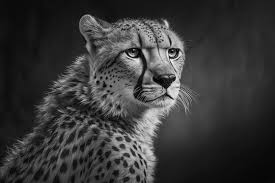

Image after Addition (img + 50):


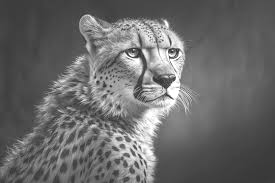

Image after Subtraction (img - 50):


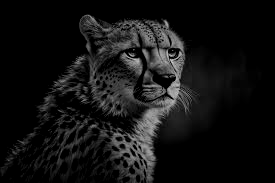

Image after Multiplication (img * 1.5):


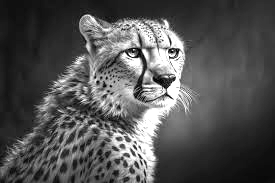

Image after Division (img / 2):


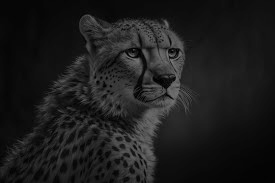

In [12]:

# Step 2: Perform arithmetic operations on the grayscale image

# Adding a scalar value (50) to the image
img_add = cv2.add(img_gray, 50)

# Subtracting a scalar value (50) from the image
img_subtract = cv2.subtract(img_gray, 50)

# Multiplying the image by a scalar (1.5) and clipping values to 255
img_multiply = cv2.multiply(img_gray, 1.5)  # Multiplies element-wise

# Dividing the image by a scalar (2)
img_divide = cv2.divide(img_gray, 2)

# Step 3: Display the results
print("Original Grayscale Image:")
cv2_imshow(img_gray)

print("Image after Addition (img + 50):")
cv2_imshow(img_add)

print("Image after Subtraction (img - 50):")
cv2_imshow(img_subtract)

print("Image after Multiplication (img * 1.5):")
cv2_imshow(img_multiply)

print("Image after Division (img / 2):")
cv2_imshow(img_divide)

Original Grayscale Image:


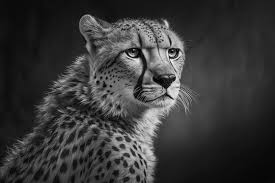

Translated Image:


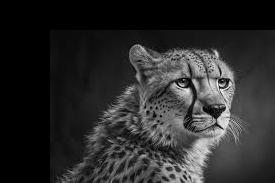

Rotated Image (45 degrees):


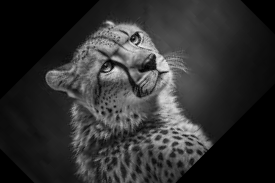

Scaled Image (1.5x):


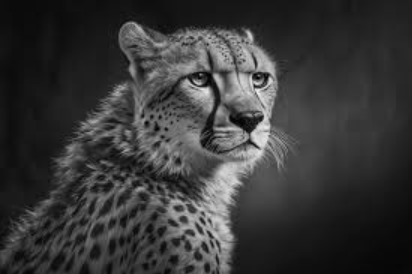

Sheared Image (0.3 factor):


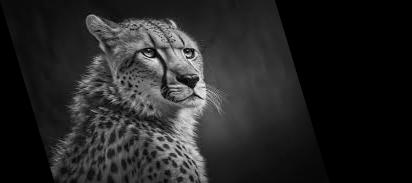

In [14]:
# Get image dimensions
height, width = img_gray.shape

# --- 1. Translation ---
# Define translation matrix to move image 50 pixels right and 30 pixels down
tx, ty = 50, 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
img_translated = cv2.warpAffine(img_gray, translation_matrix, (width, height))

# --- 2. Rotation ---
# Define rotation matrix to rotate the image 45 degrees around the center
angle = 45
center = (width // 2, height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)  # Scale = 1.0
img_rotated = cv2.warpAffine(img_gray, rotation_matrix, (width, height))

# --- 3. Scaling ---
# Define scaling matrix to scale the image by 1.5 times in both x and y directions
scaling_factor = 1.5
img_scaled = cv2.resize(img_gray, None, fx=scaling_factor, fy=scaling_factor)

# --- 4. Shearing ---
# Define shearing matrix (shear in x direction by 0.3)
shear_factor = 0.3
shearing_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
img_sheared = cv2.warpAffine(img_gray, shearing_matrix, (int(width * 1.5), height))

# Step 3: Display the results
print("Original Grayscale Image:")
cv2_imshow(img_gray)

print("Translated Image:")
cv2_imshow(img_translated)

print("Rotated Image (45 degrees):")
cv2_imshow(img_rotated)

print("Scaled Image (1.5x):")
cv2_imshow(img_scaled)

print("Sheared Image (0.3 factor):")
cv2_imshow(img_sheared)

Image after Addition (2.png + 5.png):


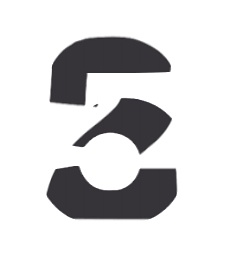

Image after Subtraction (2.png - 5.png):


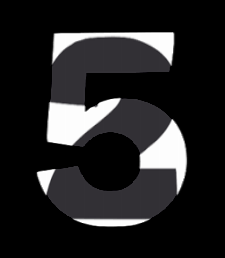

Combined Image (25.jpg):


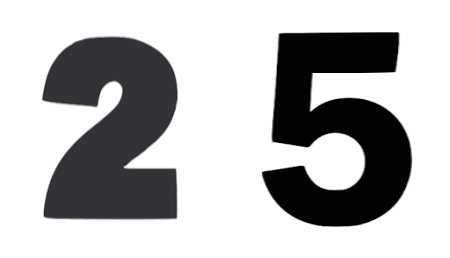

True

In [21]:
# Step 2: Load the two images corresponding to roll number 25
img1 = cv2.imread('/content/2.png')
img2 = cv2.imread('/content/5.png')

# Step 3: Resize both images to the same dimensions (width and height)
height = max(img1.shape[0], img2.shape[0])  # Use the max height
width = max(img1.shape[1], img2.shape[1])  # Use the max width

# Resize both images to match the width and height
img1_resized = cv2.resize(img1, (width, height))
img2_resized = cv2.resize(img2, (width, height))

# Step 4: Perform addition and subtraction
img_add = cv2.add(img1_resized, img2_resized)  # Add the two images
img_subtract = cv2.subtract(img1_resized, img2_resized)  # Subtract the two images

# Step 5: Display the resulting images for addition and subtraction
print("Image after Addition (2.png + 5.png):")
cv2_imshow(img_add)

print("Image after Subtraction (2.png - 5.png):")
cv2_imshow(img_subtract)

# Step 6: Save the resulting images from addition and subtraction
cv2.imwrite('/content/25_add.png', img_add)
cv2.imwrite('/content/25_subtract.png', img_subtract)

# Step 7: Concatenate the images horizontally to form 25.jpg
combined_img = np.hstack((img1_resized, img2_resized))  # Horizontal stacking

# Step 8: Display and save the combined image
print("Combined Image (25.jpg):")
cv2_imshow(combined_img)
cv2.imwrite('/content/25.jpg', combined_img)

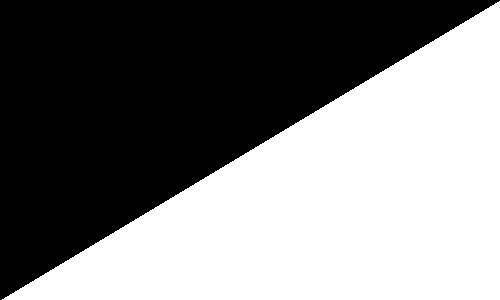

True

In [33]:
# Step 1: Create a blank image (rectangle) with white background
height, width = 300, 500  # You can adjust the dimensions here
img = np.ones((height, width, 3), dtype=np.uint8) * 255  # Initialize with white (255)

# Step 2: Fill the bottom-right triangle (diagonal split) with black
for y in range(height):
### uncomment based on "top-left diagonal" or "top-right diagonal"
    # for x in range(y * width // height, width):
    for x in range(0, width - (y * width // height)):
        img[y, x] = (0, 0, 0)  # Set the pixels to black

# Step 3: Show the image
cv2_imshow(img)

# Step 4: Save the image if needed
cv2.imwrite('/content/diagonal_split.png', img)


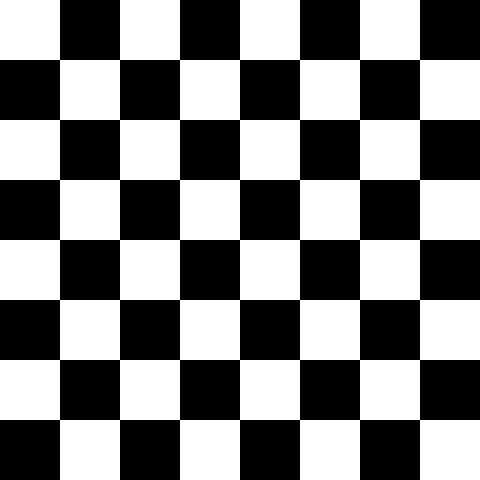

True

In [35]:
# Step 1: Create a blank image with white background
board_size = 8  # Chessboard size (8x8)
square_size = 60  # Size of each square in pixels
width = height = board_size * square_size  # Image dimensions

# Step 2: Create a blank image with all white squares
img = np.ones((height, width, 3), dtype=np.uint8) * 255  # Initialize with white (255)

# Step 3: Create the chessboard pattern
for row in range(board_size):
    for col in range(board_size):
        # Make the top-left square white (i.e., when (row + col) is even)
        if (row + col) % 2 == 0:
            img[row * square_size: (row + 1) * square_size, col * square_size: (col + 1) * square_size] = (255, 255, 255)  # White square
        else:
            img[row * square_size: (row + 1) * square_size, col * square_size: (col + 1) * square_size] = (0, 0, 0)  # Black square

# Step 4: Show the chessboard
cv2_imshow(img)

# Step 5: Save the image if needed
cv2.imwrite('/content/chessboard.png', img)

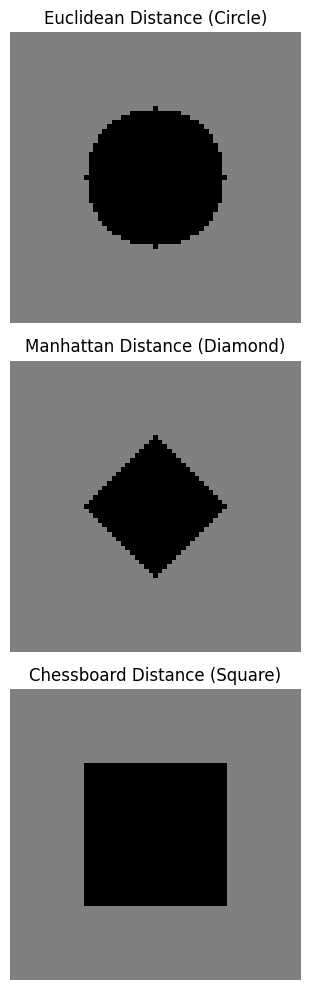

In [52]:
# Function to generate a solid Euclidean distance (circle)
def euclidean_distance(img, center, max_distance):
    height, width, _ = img.shape
    for y in range(height):
        for x in range(width):
            dist = np.sqrt((x - center[0])**2 + (y - center[1])**2)
            if dist <= max_distance:
                img[y, x] = (0, 0, 0)  # Inside the circle, set to black
            else:
                img[y, x] = (127, 127, 127)  # Outside the circle, set to white
    return img

# Function to generate a solid Manhattan distance (diamond)
def manhattan_distance(img, center, max_distance):
    height, width, _ = img.shape
    for y in range(height):
        for x in range(width):
            dist = abs(x - center[0]) + abs(y - center[1])
            if dist <= max_distance:
                img[y, x] = (0, 0, 0)  # Inside the diamond, set to black
            else:
                img[y, x] = (127, 127, 127)  # Outside the diamond, set to white
    return img

# Function to generate a solid Chessboard distance (square)
def chessboard_distance(img, center, max_distance):
    height, width, _ = img.shape
    for y in range(height):
        for x in range(width):
            dist = max(abs(x - center[0]), abs(y - center[1]))
            if dist <= max_distance:
                img[y, x] = (0, 0, 0)  # Inside the square, set to black
            else:
                img[y, x] = (127, 127, 127)  # Outside the square, set to white
    return img

# Set up parameters for the grid
height, width = 63, 63
center = (width // 2, height // 2)  # center of the image
max_distance = min(center) // 2  # Max distance will be half of the smaller dimension

# Create blank images for each distance
euclidean_img = np.ones((height, width, 3), dtype=np.uint8) * 127  # white background
manhattan_img = np.ones((height, width, 3), dtype=np.uint8) * 127  # white background
chessboard_img = np.ones((height, width, 3), dtype=np.uint8) * 127  # white background

# Generate solid distance figures
euclidean_img = euclidean_distance(euclidean_img, center, max_distance)
manhattan_img = manhattan_distance(manhattan_img, center, max_distance)
chessboard_img = chessboard_distance(chessboard_img, center, max_distance)

# Plot using Matplotlib
fig, axes = plt.subplots(3, 1, figsize=(5, 10))

# Show the images in the other axes
axes[0].imshow(cv2.cvtColor(euclidean_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Euclidean Distance (Circle)')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(manhattan_img, cv2.COLOR_BGR2RGB))
axes[1].set_title('Manhattan Distance (Diamond)')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(chessboard_img, cv2.COLOR_BGR2RGB))
axes[2].set_title('Chessboard Distance (Square)')
axes[2].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Optionally save the image
fig.savefig('/content/distance_metric_patterns_with_title_matplotlib.png', dpi=300)
